In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [20]:
noreuse = pd.read_csv('noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,151465984
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321786
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26198906
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273534
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,25817637
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,742
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144642048
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1324145
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26213010
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275674
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,25831070
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3714
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,740
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,3231


In [21]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [22]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,144642048,reuse_across_ctor_disabled,151465984
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1324145,reuse_across_ctor_disabled,1321786
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26213010,reuse_across_ctor_disabled,26198906
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1275674,reuse_across_ctor_disabled,1273534
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,25831070,reuse_across_ctor_disabled,25817637
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3714,reuse_across_ctor_disabled,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,740,reuse_across_ctor_disabled,742
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,3231,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta.lean,480,776,296,38.144330
1,Lean/Compiler/LCNF/Passes.lean,829,1233,404,32.765612
2,Lean/Meta/Offset.lean,1683,2432,749,30.797697
3,Lean/Compiler/IR/Boxing.lean,1570,2161,591,27.348450
4,Lean/Meta/Tactic/LinearArith/Nat/Solver.lean,292,396,104,26.262626
...,...,...,...,...,...
845,Lean/Data/Json/Printer.lean,494,397,-97,-24.433249
846,Lean/Elab/Extra.lean,4731,3778,-953,-25.224987
847,Lake/Util/NativeLib.lean,312,249,-63,-25.301205
848,Init/Omega/Logic.lean,239,174,-65,-37.356322


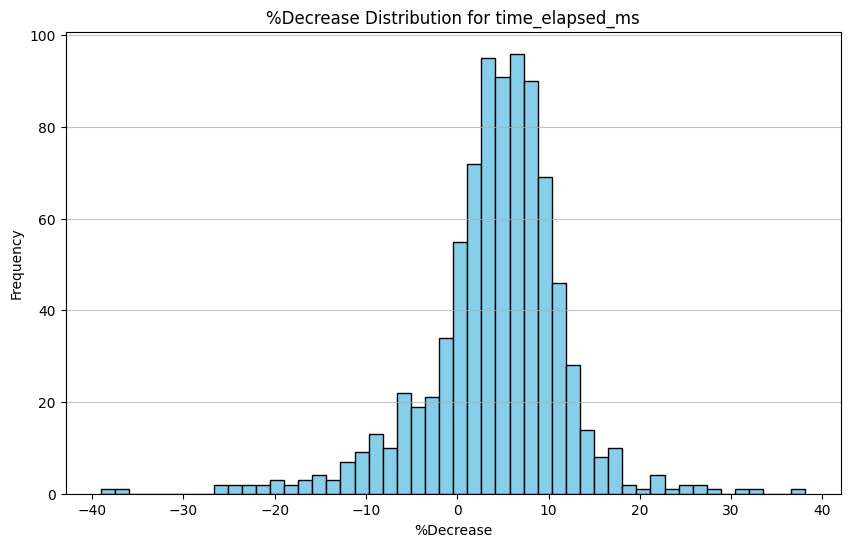

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Coe.lean,73400320,79822848,6422528,8.045977
1,Lean/Runtime.lean,67895296,73531392,5636096,7.664884
2,Init/Data/Int/Basic.lean,94773248,102600704,7827456,7.629047
3,Init/Data/List/Control.lean,99520512,107524096,8003584,7.443526
4,Init/SizeOf.lean,83337216,89767936,6430720,7.163716
...,...,...,...,...,...
845,Lean/Compiler/LCNF.lean,259866624,261971968,2105344,0.803652
846,Lean/Elab/PreDefinition/WF.lean,331780096,334409728,2629632,0.786350
847,Lean/MetavarContext.lean,208674816,210325504,1650688,0.784825
848,Lean.lean,497250304,501055488,3805184,0.759434


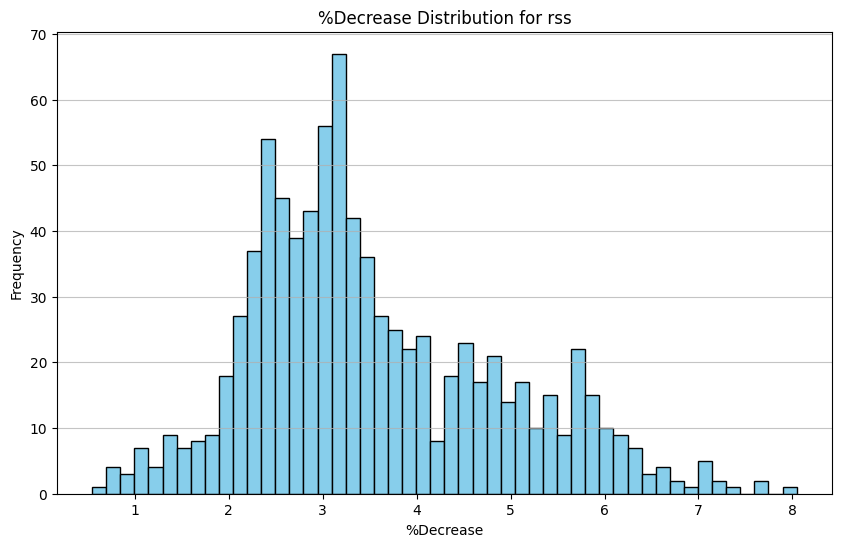

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Coe.lean,11109874,12018127,908253,7.557359
1,Lean/Data/Format.lean,2706953,2840952,133999,4.716694
2,Lean/Data/Lsp/Internal.lean,7871060,8232547,361487,4.390950
3,Lean/Server/Rpc/Deriving.lean,18203272,18823801,620529,3.296513
4,Lean/Meta/Tactic/Rewrite.lean,6723040,6900189,177149,2.567306
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,12065347,11926464,-138883,-1.164494
846,Lean/Compiler/IR/EmitLLVM.lean,89074094,87824771,-1249323,-1.422518
847,Lean/ParserCompiler.lean,41007105,40314169,-692936,-1.718840
848,Lean/Parser.lean,10744301,10426952,-317349,-3.043545


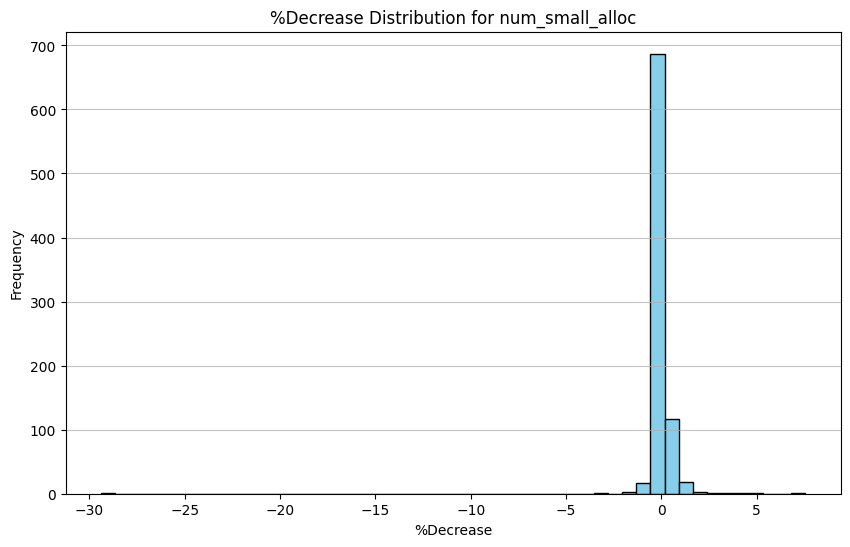

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/Format.lean,119832,137690,17858,12.969715
1,Lean/Server/Rpc/Deriving.lean,750995,848615,97620,11.503450
2,Lean/Meta/Coe.lean,487969,537971,50002,9.294553
3,Lean/Data/Lsp/Internal.lean,364065,397898,33833,8.502933
4,Lean/Elab/Deriving/TypeName.lean,118932,128934,10002,7.757457
...,...,...,...,...,...
845,Lean/Compiler/IR/NormIds.lean,288733,282652,-6081,-2.151409
846,Lean/Meta/Tactic/Simp/BuiltinSimprocs/Nat.lean,284323,277772,-6551,-2.358409
847,Lean/Meta/Offset.lean,525783,510360,-15423,-3.021984
848,Lean/ParserCompiler.lean,1497247,1431573,-65674,-4.587541


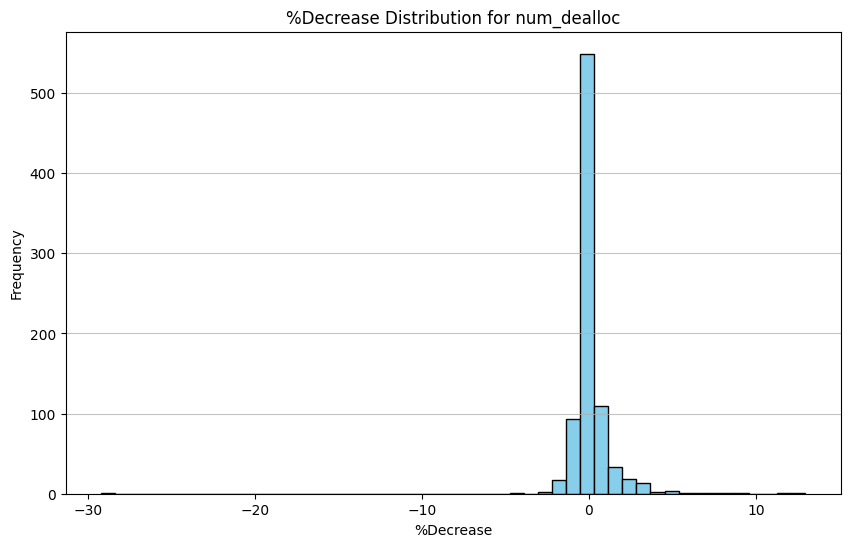

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Coe.lean,10622416,11513823,891407,7.742059
1,Lean/Data/Format.lean,2363575,2491860,128285,5.148162
2,Lean/Data/Lsp/Internal.lean,7458853,7811653,352800,4.516330
3,Lean/Server/Rpc/Deriving.lean,17562519,18161433,598914,3.297724
4,Lean/Meta/Tactic/Rewrite.lean,6230126,6401244,171118,2.673199
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,11591664,11457448,-134216,-1.171430
846,Lean/Compiler/IR/EmitLLVM.lean,88333521,87095529,-1237992,-1.421419
847,Lean/ParserCompiler.lean,40305793,39633785,-672008,-1.695543
848,Lean/Parser.lean,10173048,9858658,-314390,-3.188974


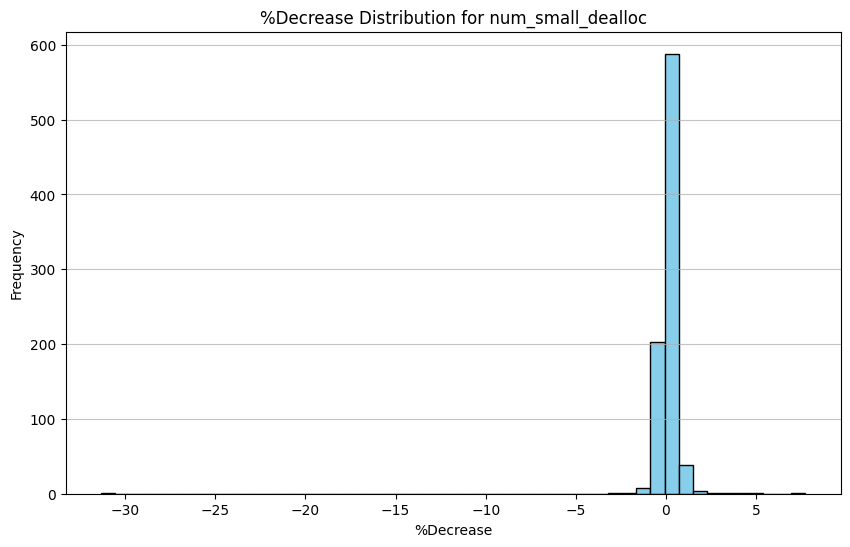

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/Coe.lean,195930,574072,378142,65.870135
1,Lean/Server/Rpc/Deriving.lean,547616,1072291,524675,48.930281
2,Lean/Data/Format.lean,132459,257557,125098,48.570996
3,Lean/Data/Lsp/Internal.lean,280393,527203,246810,46.814984
4,Lean/Meta/Tactic/Rewrite.lean,194414,336709,142295,42.260528
...,...,...,...,...,...
845,Lean/Meta/Offset.lean,287398,238132,-49266,-20.688526
846,Lean/Compiler/LCNF/CompatibleTypes.lean,56360,46534,-9826,-21.115743
847,Lean/Meta/Match/Value.lean,28846,23438,-5408,-23.073641
848,Lean/ImportingFlag.lean,11997,9309,-2688,-28.875282


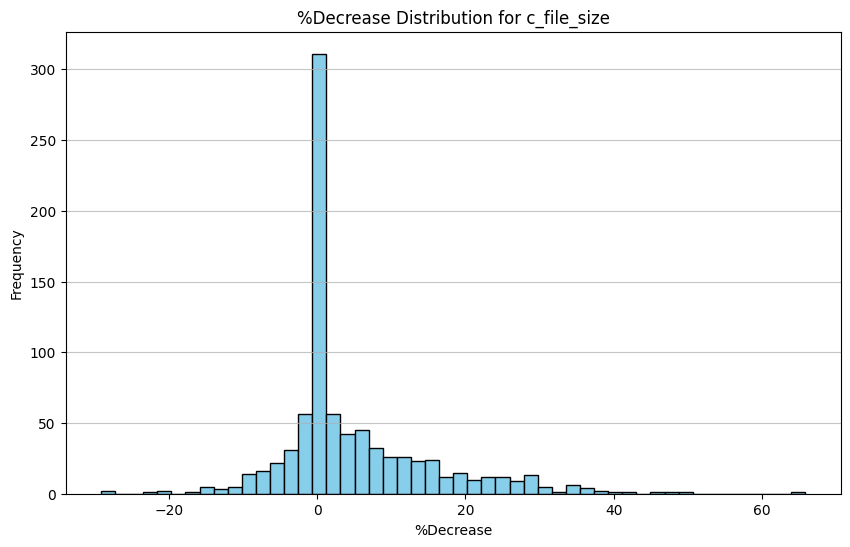

<Axes: >

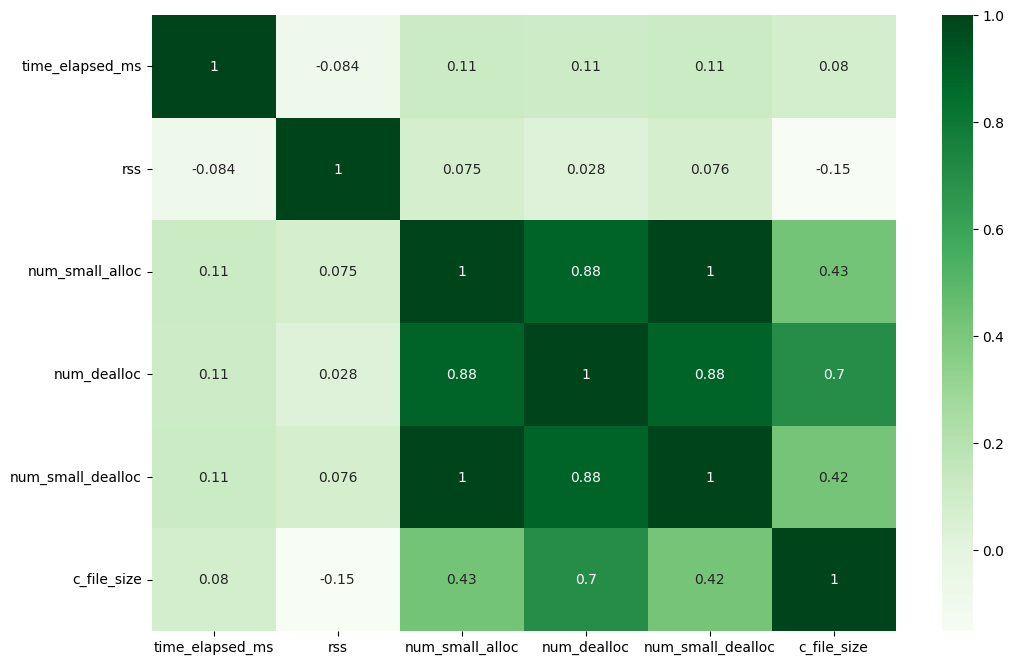

In [23]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,19265,4046008
Lean/Elab/Do.lean,16524,6328549
Lean/PrettyPrinter/Delaborator/Builtins.lean,13292,5251635
Lean/Compiler/IR/EmitLLVM.lean,12677,3718633
Lean/Elab/Quotation.lean,12290,3914838
...,...,...
Lean/Meta/TransparencyMode.lean,121,63392
Init/Data/FloatArray.lean,120,55505
Init/Data/ByteArray.lean,118,55555


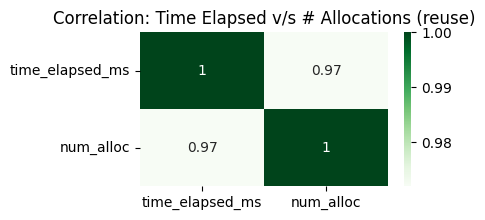

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,20284,4060736
Lean/Elab/Do.lean,18088,6328533
Lean/PrettyPrinter/Delaborator/Builtins.lean,14588,5256407
Lean/Compiler/IR/EmitLLVM.lean,13446,3647878
Lean/Elab/App.lean,12099,4042744
...,...,...
Init/Data/FloatArray.lean,126,55502
Init/Data/ByteArray.lean,124,55552
Init/Data/String.lean,123,55644


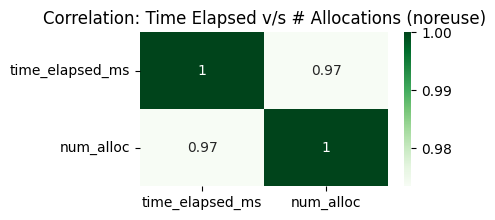

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,20284,4060736
Lean/Elab/Tactic/Omega/Frontend.lean,19265,4046008
Lean/Elab/Do.lean,18088,6328533
Lean/Elab/Do.lean,16524,6328549
Lean/PrettyPrinter/Delaborator/Builtins.lean,14588,5256407
...,...,...
Init/Data/ByteArray.lean,118,55555
Init/Data/Char.lean,116,53141
Init/Data/Cast.lean,115,48545


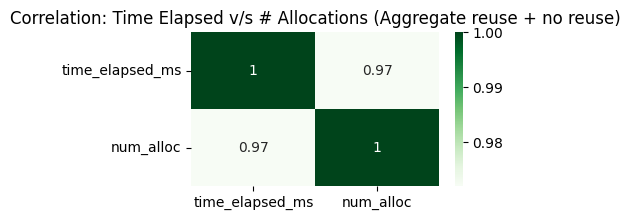

In [24]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: